In [1]:
import numpy as np
import pandas as pd
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv(
    "mydataset.csv",
    names=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"])

df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,750
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,750
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,750
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,750
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,750


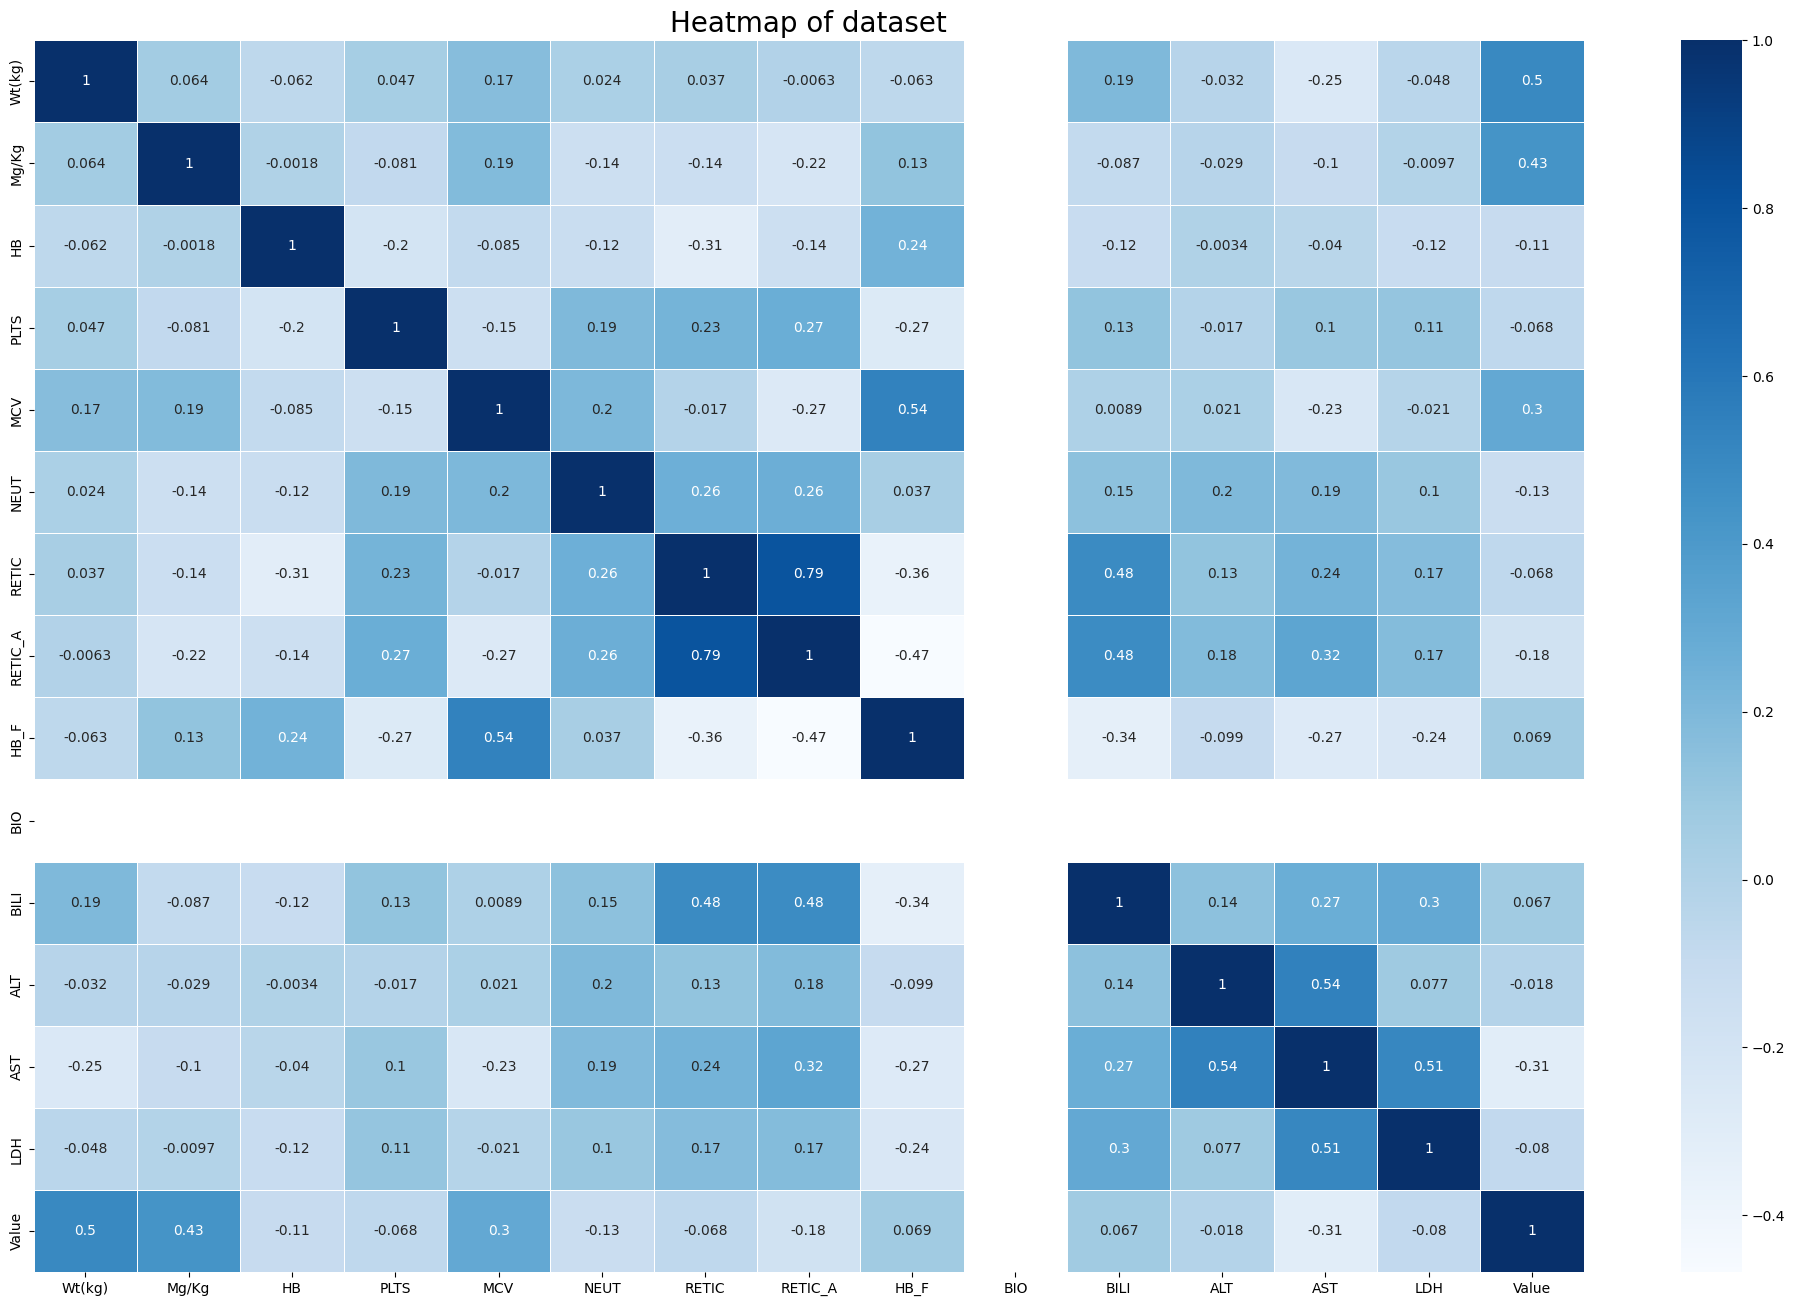

In [18]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"]].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

C:\Users\asus\AppData\Local\Temp\ipykernel_19944\2173010017.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = 30, kde = True, color='r')


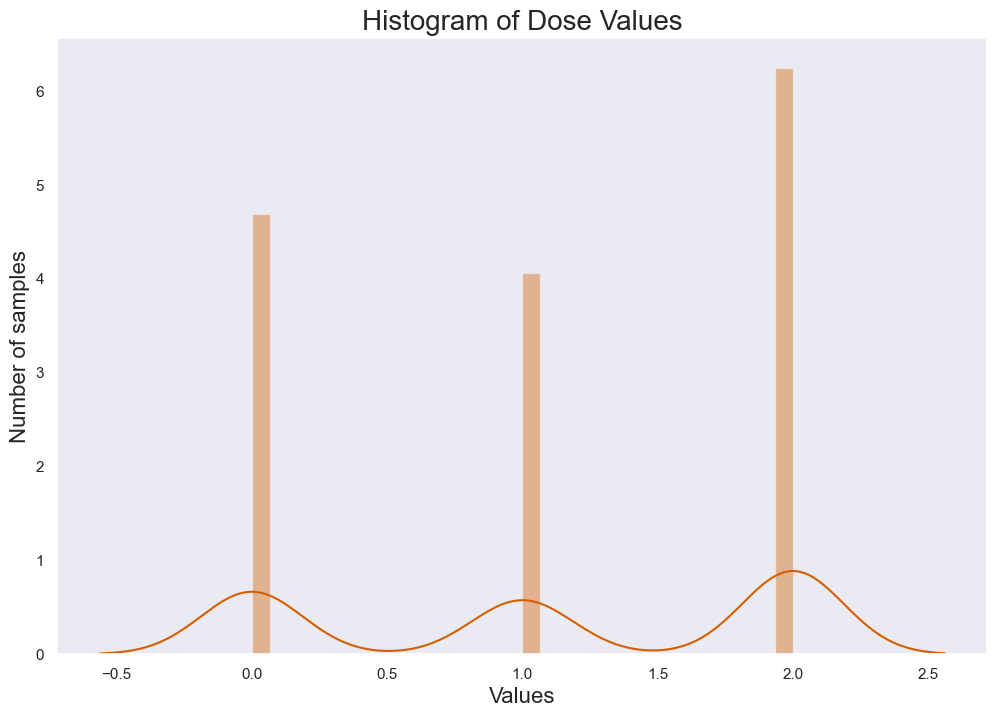

In [19]:
# Histogram: number of players's age
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Value
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 30, kde = True, color='r')
ax.set_xlabel(xlabel="Values", fontsize=16)
ax.set_ylabel(ylabel='Number of samples', fontsize=16)
ax.set_title(label='Histogram of Dose Values', fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat,
                                                    test_size=0.2)

In [ ]:
# Build the model

model = Sequential()
model.add(Dense(60, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

In [ ]:
y_pred_class = model.predict(x_test)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_class, y_pred_class)

In [ ]:
#Predict
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class))

## KNN

In [1]:
import numpy as np
import pandas as pd
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv(
    "mydataset.csv",
    names=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"])

df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,750
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,750
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,750
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,750
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,750


In [2]:
df["Value"].unique()

array([ 750, 1000,  600,  300, 1200, 1500,  250,  500,  700], dtype=int64)

In [3]:
df.isnull().values.any()

False

In [4]:
df["Value"] = df["Value"].map({250 :0, 300 :0, 500 :0, 600 :1, 700 :1, 750 :1, 1000 :2, 1200 :2, 1500 :2}).astype(int) #mapping numbers
df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,1
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,1
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,1
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,1
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,1


In [5]:
x = df.drop("Value", axis = 1)
y = df["Value"]
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1891    0
1892    0
1893    0
1894    0
1895    0
Name: Value, Length: 1896, dtype: int32


In [6]:
x_data = df.drop(["Value"],axis=1)
y_data = df["Value"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH"])
data.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH
0,0.27383,0.645161,0.547619,0.270266,0.179314,0.087964,0.112745,0.196348,0.109922,0.0,0.076142,0.125000,0.278195,0.218212
1,0.27383,0.645161,0.547619,0.309430,0.190287,0.044094,0.088235,0.147651,0.045431,0.0,0.151777,0.089674,0.260150,0.218212
2,0.27383,0.645161,0.563492,0.056860,0.197759,0.050169,0.058824,0.097862,0.067363,0.0,0.151777,0.089674,0.260150,0.218212
3,0.27383,0.645161,0.531746,0.069648,0.195657,0.033858,0.080882,0.125020,0.068407,0.0,0.060914,0.070652,0.255639,0.218212
4,0.27383,0.645161,0.611111,0.072846,0.196124,0.049381,0.093137,0.155923,0.109922,0.0,0.151777,0.089674,0.260150,0.218212


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 5)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

## Neural Network

In [8]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical


df = pd.read_csv(
    "mydataset.csv",
    names=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"])

df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,750
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,750
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,750
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,750
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,750


In [9]:
df["Value"] = df["Value"].map({250 :0, 300 :0, 500 :0, 600 :1, 700 :1, 750 :1, 1000 :2, 1200 :2, 1500 :2}).astype(int) #mapping numbers
df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,1
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,1
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,1
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,1
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,1


In [10]:
x = df.drop("Value", axis = 1)
y = df["Value"]
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
1891    0
1892    0
1893    0
1894    0
1895    0
Name: Value, Length: 1896, dtype: int32


In [11]:
x_data = df.drop(["Value"],axis=1)
y_data = df["Value"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH"])
data.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH
0,0.27383,0.645161,0.547619,0.270266,0.179314,0.087964,0.112745,0.196348,0.109922,0.0,0.076142,0.125000,0.278195,0.218212
1,0.27383,0.645161,0.547619,0.309430,0.190287,0.044094,0.088235,0.147651,0.045431,0.0,0.151777,0.089674,0.260150,0.218212
2,0.27383,0.645161,0.563492,0.056860,0.197759,0.050169,0.058824,0.097862,0.067363,0.0,0.151777,0.089674,0.260150,0.218212
3,0.27383,0.645161,0.531746,0.069648,0.195657,0.033858,0.080882,0.125020,0.068407,0.0,0.060914,0.070652,0.255639,0.218212
4,0.27383,0.645161,0.611111,0.072846,0.196124,0.049381,0.093137,0.155923,0.109922,0.0,0.151777,0.089674,0.260150,0.218212


In [12]:
y_cat = to_categorical(y)
print(y_cat)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_cat, test_size=0.1)

In [14]:
model = Sequential()
model.add(Dense(256, input_shape = (14,), activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))
model.compile(Adam(learning_rate = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3840      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 136,963
Trainable params: 136,963
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, batch_size=25, validation_split=0.1,  epochs=130, verbose=2)

Epoch 1/130
62/62 - 1s - loss: 0.9275 - accuracy: 0.5531 - val_loss: 0.7766 - val_accuracy: 0.6491 - 782ms/epoch - 13ms/step
Epoch 2/130
62/62 - 0s - loss: 0.7736 - accuracy: 0.6404 - val_loss: 0.7036 - val_accuracy: 0.6667 - 176ms/epoch - 3ms/step
Epoch 3/130
62/62 - 0s - loss: 0.7225 - accuracy: 0.6625 - val_loss: 0.6802 - val_accuracy: 0.7018 - 175ms/epoch - 3ms/step
Epoch 4/130
62/62 - 0s - loss: 0.7119 - accuracy: 0.6704 - val_loss: 0.6719 - val_accuracy: 0.6901 - 173ms/epoch - 3ms/step
Epoch 5/130
62/62 - 0s - loss: 0.6933 - accuracy: 0.6866 - val_loss: 0.6411 - val_accuracy: 0.6959 - 182ms/epoch - 3ms/step
Epoch 6/130
62/62 - 0s - loss: 0.6910 - accuracy: 0.6736 - val_loss: 0.7132 - val_accuracy: 0.6725 - 180ms/epoch - 3ms/step
Epoch 7/130
62/62 - 0s - loss: 0.6639 - accuracy: 0.6932 - val_loss: 0.6014 - val_accuracy: 0.7251 - 168ms/epoch - 3ms/step
Epoch 8/130
62/62 - 0s - loss: 0.6363 - accuracy: 0.7075 - val_loss: 0.6085 - val_accuracy: 0.7193 - 174ms/epoch - 3ms/step
Epoch 9

Epoch 67/130
62/62 - 0s - loss: 0.4093 - accuracy: 0.8221 - val_loss: 0.5489 - val_accuracy: 0.7251 - 244ms/epoch - 4ms/step
Epoch 68/130
62/62 - 0s - loss: 0.4133 - accuracy: 0.8221 - val_loss: 0.5026 - val_accuracy: 0.7485 - 184ms/epoch - 3ms/step
Epoch 69/130
62/62 - 0s - loss: 0.4081 - accuracy: 0.8235 - val_loss: 0.5291 - val_accuracy: 0.7661 - 181ms/epoch - 3ms/step
Epoch 70/130
62/62 - 0s - loss: 0.4058 - accuracy: 0.8235 - val_loss: 0.4682 - val_accuracy: 0.7953 - 186ms/epoch - 3ms/step
Epoch 71/130
62/62 - 0s - loss: 0.4161 - accuracy: 0.8104 - val_loss: 0.4705 - val_accuracy: 0.7778 - 189ms/epoch - 3ms/step
Epoch 72/130
62/62 - 0s - loss: 0.4051 - accuracy: 0.8215 - val_loss: 0.4780 - val_accuracy: 0.7778 - 191ms/epoch - 3ms/step
Epoch 73/130
62/62 - 0s - loss: 0.4066 - accuracy: 0.8241 - val_loss: 0.4994 - val_accuracy: 0.7661 - 235ms/epoch - 4ms/step
Epoch 74/130
62/62 - 0s - loss: 0.4106 - accuracy: 0.8202 - val_loss: 0.4979 - val_accuracy: 0.7836 - 241ms/epoch - 4ms/step


In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3318774998188019
Test accuracy: 0.8684210777282715


In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print("Confusion Matrix:")
print(result)

target_names = ['class 0', 'class 1', 'class 2']
result1 = classification_report( y_prediction, y_test, target_names = target_names)
print()
print(result1)
result2 = accuracy_score( y_prediction, y_test)

6/6 [==============================] - 0s 2ms/step
Confusion Matrix:
[[0.911 0.119 0.029]
 [0.067 0.857 0.117]
 [0.022 0.024 0.854]]

              precision    recall  f1-score   support

     class 0       0.84      0.91      0.87        45
     class 1       0.71      0.86      0.77        42
     class 2       0.98      0.85      0.91       103

    accuracy                           0.87       190
   macro avg       0.84      0.87      0.85       190
weighted avg       0.88      0.87      0.87       190



ValueError: in user code:

    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\asus\OneDrive\Desktop\MLpaper\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


<AxesSubplot: >

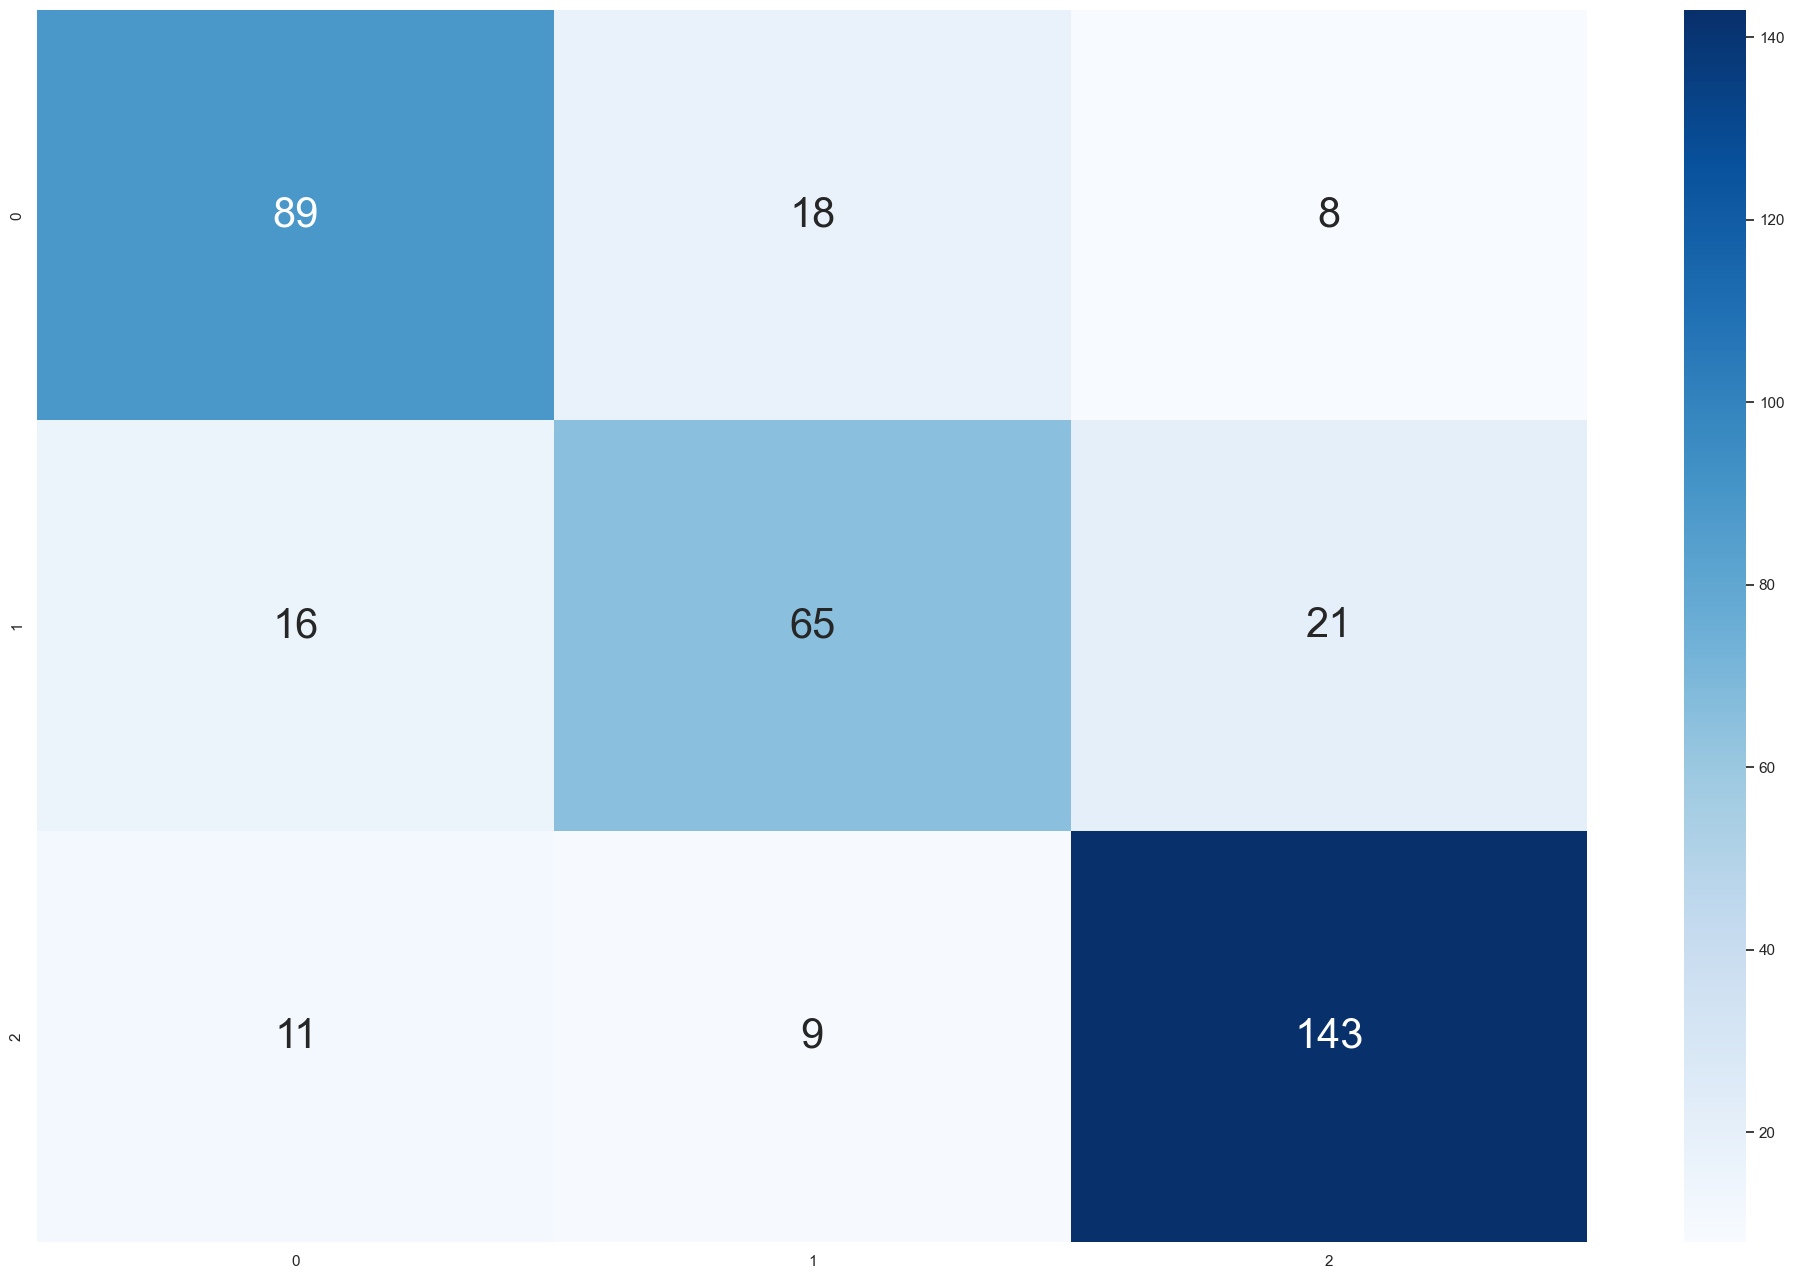

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mtb

result = np.array([[89, 18, 8],
                  [16, 65, 21],
                  [11, 9, 143]])

sns.heatmap(result, annot=True, fmt='', cmap='Blues', annot_kws={'size': 30})
